In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats
from sklearn import preprocessing 
import numpy as np

%matplotlib inline
train = pd.read_csv('data/train.csv')
train_sample = train.sample(train.shape[0]/2)
test = pd.read_csv('data/test.csv')

In [2]:
#remove Na's from the dataframe
def remove_nas(dataframe, percent):
    null_data = dataframe.isnull().sum()
    data_to_remove = null_data[null_data > dataframe.shape[0]*percent].index.tolist()
    dataframe.drop(data_to_remove,1, inplace = True)
    return dataframe

In [3]:
#get the non-numerical data
def categorical_data(dataframe):
    dtype = dataframe.dtypes
    categories = dtype[dtype == 'object'].index.tolist()
    category_dataframe = dataframe[categories]
    return category_dataframe

In [4]:
#give each category a numerial value
def category_to_num(category_data):
    le = preprocessing.LabelEncoder()
    le.fit(np.unique(category_data.values))
    cat = category_data.apply(le.transform)
    return cat

In [50]:
#graph catgeorical data

def graph_processed_data(dataframe_with_sale_price, cat_data):
    num_col = len(cat_data.columns.values)
    graph_dimension = int(round(math.sqrt(num_col)))+1

    f, ax = plt.subplots(graph_dimension, graph_dimension,figsize=(8,12))
    plt.subplots_adjust( hspace=0.3 )
    plt.subplots_adjust( wspace=0.04 )

    y = dataframe_with_sale_price['SalePrice']
    counter = 0

    list_of_predictors =[]
    
    for i in range(graph_dimension):
        for j in range(graph_dimension):
            ax[i][j].get_yaxis().set_ticks([])
            ax[i][j].get_xaxis().set_ticks([])
            if counter >= num_col:
                continue
            else:
                x = cat_data.iloc[:, counter]
                ax[i][j].scatter(x,y)
                ax[i][j].set_title(cat_data.columns.values[counter])
            
                slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
                print str(cat_data.columns.values[counter]), r_value**2
                #if r_value**2 > 0.3:
                #    list_of_predictors.append(independent_var.columns.values[counter])
                counter = counter + 1

    #final_int_train = independent_var[list_of_predictors]
    #return list_of_predictors, dataframe, final_int_train

Index([u'MSZoning', u'Street', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'ExterQual',
       u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinType1', u'BsmtFinType2', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'KitchenQual', u'Functional',
       u'GarageType', u'GarageFinish', u'GarageQual', u'GarageCond',
       u'PavedDrive', u'SaleType', u'SaleCondition'],
      dtype='object')
MSZoning 0.00107370996458
Street 0.00168391517378
LotShape 0.0713918035694
LandContour 0.00692045322473
Utilities 0.000204899074191
LotConfig 0.00624869755273
LandSlope 0.00243977399429
Neighborhood 0.0272235036766
Condition1 0.0246796003016
Condition2 0.00325351621366
BldgType 0.00548338245353
HouseStyle 0.00549260917394
RoofStyle 0.0397265715462
RoofM

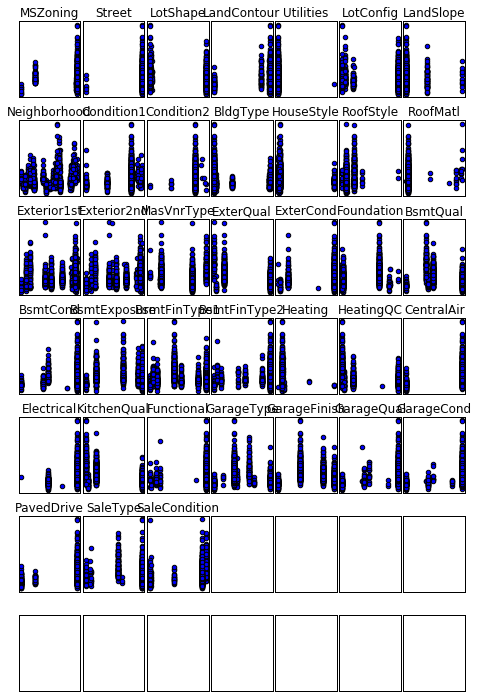

In [51]:
no_na_train = remove_nas(train, 0.1)
cat = categorical_data(no_na_train)
num_cat = category_to_num(cat)
print cat.columns
graph_processed_data(no_na_train, num_cat)

In [60]:
num_cat['SalePrice']= no_na_train['SalePrice']

In [8]:
num_cat_sale = num_cat[['SaleCondition', 'SalePrice']]

In [61]:
set(num_cat_sale['SaleCondition'].tolist())
print num_cat.head()

   MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0       128     121       135           87         13         85         76   
1       128     121       135           87         13         55         76   
2       128     121        81           87         13         85         76   
3       128     121        81           87         13         48         76   
4       128     121        81           87         13         55         76   

   Neighborhood  Condition1  Condition2    ...      KitchenQual  Functional  \
0            42         111         111    ...               72         155   
1           157          60         111    ...              150         155   
2            42         111         111    ...               72         155   
3            49         111         111    ...               72         155   
4           108         111         111    ...               72         155   

   GarageType  GarageFinish  GarageQual  GarageCon

In [80]:
# Exterior1st
colname = 'Exterior1st'
vals = num_cat[colname].unique()
sales = num_cat[[colname, 'SalePrice']]
#print sales.shape
categories = []
for v in vals:
    l = sales['SalePrice'][sales[colname] == v].tolist()
    categories.append(l)
    #print v
print len(categories)
from scipy.stats import mstats
c = categories
print len(c[0])
print len(c[1])
print len(c[2])
print mstats.kruskalwallis(c[3],c[8])

15
515
220
206
KruskalResult(statistic=24.330970068588616, pvalue=8.1124216063279026e-07)


In [10]:
eleven = num_cat_sale['SalePrice'][num_cat_sale['SaleCondition'] == 11].tolist()
twelve = num_cat_sale['SalePrice'][num_cat_sale['SaleCondition'] == 12].tolist()
fourteen = num_cat_sale['SalePrice'][num_cat_sale['SaleCondition'] == 14].tolist()
fifty_nine = num_cat_sale['SalePrice'][num_cat_sale['SaleCondition'] == 59].tolist()
one_twelve = num_cat_sale['SalePrice'][num_cat_sale['SaleCondition'] == 112].tolist()
one_twenty = num_cat_sale['SalePrice'][num_cat_sale['SaleCondition'] == 120].tolist()

In [33]:
print len(eleven),np.std(eleven)," eleven"
print len(twelve),np.std(twelve)," twelve"
print len(fourteen), np.std(fourteen)," fourteen"
print len(fifty_nine),np.std(fifty_nine), " fifty nine"
print len(one_twelve),np.std(one_twelve), " one twelve"
print len(one_twenty),np.std(one_twenty), " one twenty"
print 
print twelve
print one_twenty

101 82385.311537  eleven
4 22633.97612  twelve
12 80864.7985657  fourteen
20 46609.1729169  fifty nine
1198 69684.5343643  one twelve
125 103280.785596  one twenty

[82000, 81000, 126000, 127500]
[345000, 279500, 325300, 113000, 438780, 158000, 164500, 115000, 383970, 155000, 163990, 372402, 269500, 320000, 220000, 325624, 501837, 311872, 252678, 167240, 204900, 318000, 276000, 266000, 415298, 185000, 244600, 164700, 233230, 342643, 437154, 318061, 394432, 187750, 426000, 164990, 280000, 339750, 222000, 181134, 195400, 172500, 263435, 440000, 172785, 208300, 202665, 402861, 184750, 446261, 179665, 224500, 253293, 369900, 143000, 319000, 194201, 147000, 314813, 264561, 370878, 423000, 372500, 227875, 392000, 361919, 179540, 264132, 395000, 221500, 225000, 485000, 582933, 227680, 224000, 232600, 385000, 250580, 248900, 303477, 611657, 240000, 173733, 169990, 239799, 178900, 182000, 199900, 395192, 197000, 173900, 194000, 293077, 556581, 176485, 200141, 274725, 318000, 212900, 424870, 235

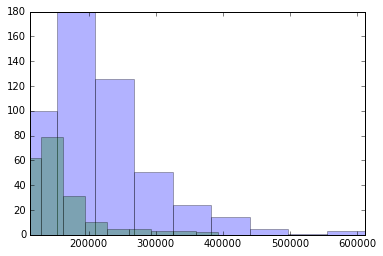

In [75]:
import numpy as np
import random
from matplotlib import pyplot as plt

data = np.random.normal(0, 20, 1000)
data = one_twenty

# fixed bin size
#bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data)-5, max(data)+5])

#plt.hist(one_twenty,color='r', alpha=0.3)

plt.hist(c[0], alpha=0.3,color='b')
plt.hist(c[1], alpha=0.3,color='g')

plt.show()


In [45]:
f_val, p_val = stats.kruskal(eleven,twelve, fourteen)
p_val

0.19436339610895123

In [46]:
f_val, p_val = stats.kruskal(eleven,twelve, fourteen, fifty_nine)
p_val

0.24593438891518035

In [47]:
f_val, p_val = stats.kruskal(eleven,twelve, fourteen, one_twenty)
p_val

2.3560623655148737e-23

In [48]:
f_val, p_val = stats.kruskal(eleven,twelve, fourteen, one_twenty, one_twelve)
p_val

1.3520990150532546e-34